In [102]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import read_parquet

donnees = read_parquet("/home/hugo/PythonFormation/travail/analyse_achat.parquet")
palette = ["#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
           "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe",
           "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe",
           ]
donnees.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'shipping_limit', 'limit', 'name_lenght',
       'description_lenght', 'photos_qty', 'weight_g', 'length_cm',
       'height_cm', 'width_cm', 'category_name', 'customer_id',
       'purchase_timestamp', 'approved_at', 'delivered_carrier',
       'delivered_customer', 'estimated_delivery', 'status', 'annee', 'mois',
       'annee_mois', 'jour', 'annee_jour', 'jour_semaine', 'trimestre',
       'annee_trimestre', 'semaine', 'annee_semaine', 'heure', 'approuvee',
       'envoyee', 'livree', 'estimee', 'customer_unique_id', 'cust_zip_code',
       'cust_city', 'cust_state', 'cust_name_state', 'cust_lat', 'cust_lng',
       'sell_zip_code', 'sell_city', 'sell_state', 'sell_name_state',
       'sell_lat', 'sell_lng'],
      dtype='object')

# Analyse des retards en fonction du temps

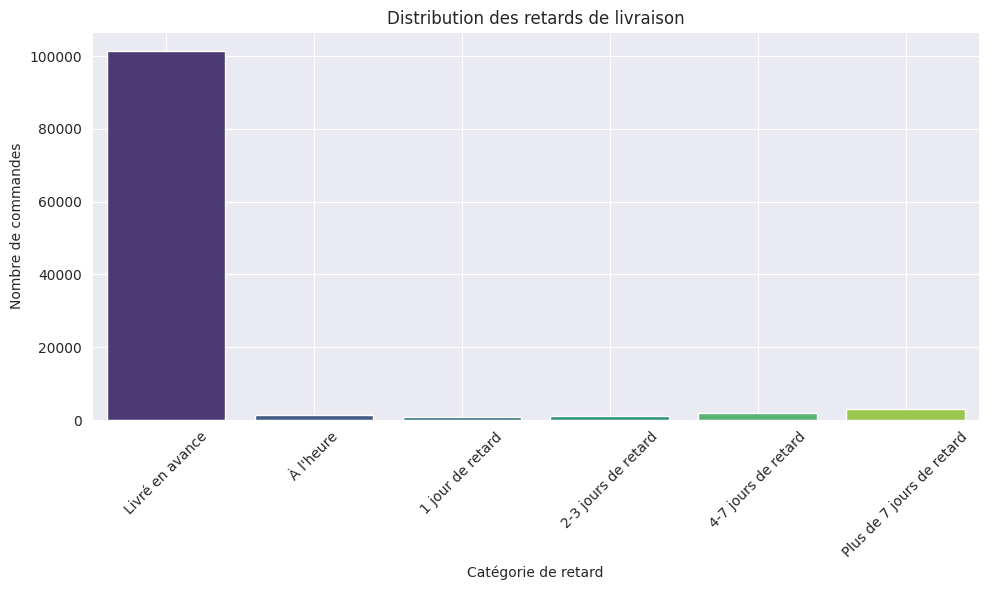

In [104]:
donnees['retard'] = (donnees['delivered_customer'] - donnees['estimated_delivery']).dt.days

donnees['categorie_retard'] = pd.cut(
    donnees['retard'],
    bins=[-float('inf'), -1, 0, 1, 3, 7, float('inf')],
    labels=['Livré en avance', 'À l\'heure', '1 jour de retard', '2-3 jours de retard', '4-7 jours de retard',
            'Plus de 7 jours de retard']
)

retards_distribution = donnees['categorie_retard'].value_counts().sort_index()
donnees['en_retard'] = donnees['retard'] > 0
donnees['en_retard'] = donnees['en_retard'].map({True: 'Oui', False: 'Non'})

plt.figure(figsize=(10, 6))
sns.barplot(x=retards_distribution.index, y=retards_distribution.values, hue=retards_distribution.index, dodge=False,
            palette='viridis')
plt.title("Distribution des retards de livraison")
plt.xlabel("Catégorie de retard")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()


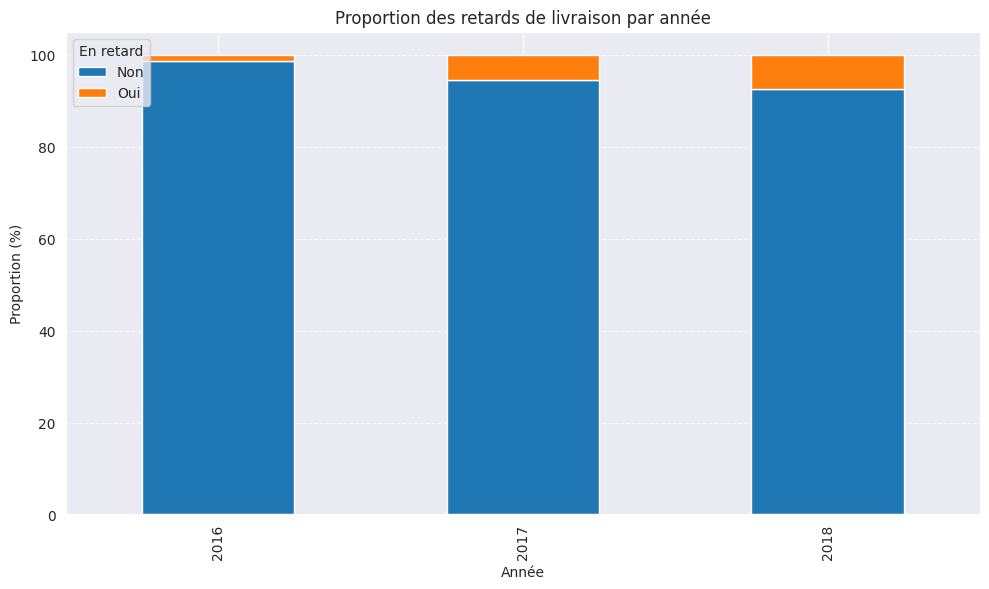

In [105]:
retards_par_annee = donnees.groupby('annee')['en_retard'].value_counts(normalize=True).unstack().fillna(0)

retards_par_annee = retards_par_annee * 100

retards_par_annee.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title("Proportion des retards de livraison par année")
plt.xlabel("Année")
plt.ylabel("Proportion (%)")
plt.legend(title="En retard", labels=['Non', 'Oui'], loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

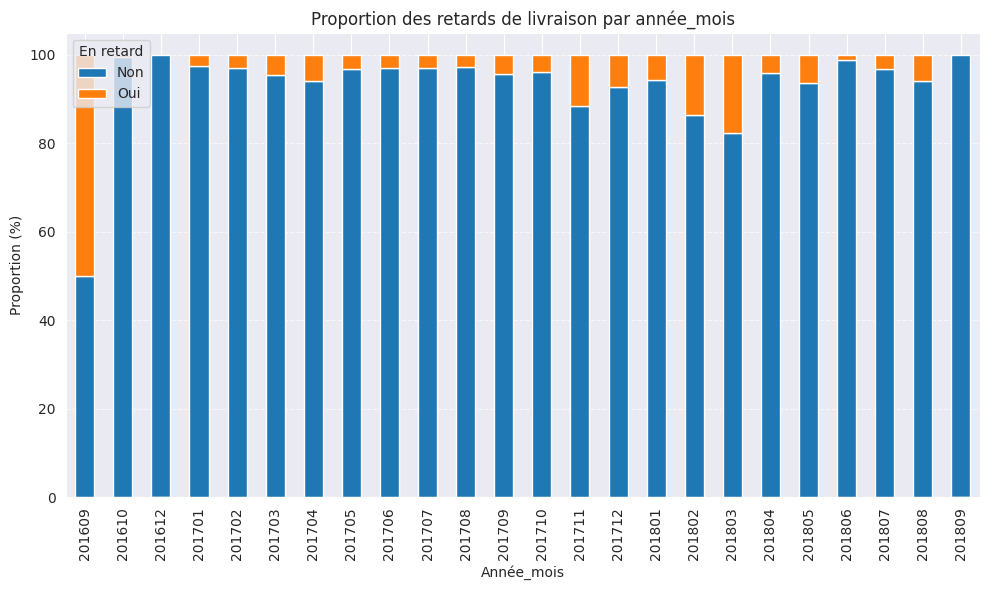

In [106]:
retards_par_annee_mois = donnees.groupby('annee_mois')['en_retard'].value_counts(normalize=True).unstack().fillna(0)

retards_par_annee_mois = retards_par_annee_mois * 100

retards_par_annee_mois.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title("Proportion des retards de livraison par année_mois")
plt.xlabel("Année_mois")
plt.ylabel("Proportion (%)")
plt.legend(title="En retard", labels=['Non', 'Oui'], loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Produits acheté en fonction du lieu de résidence

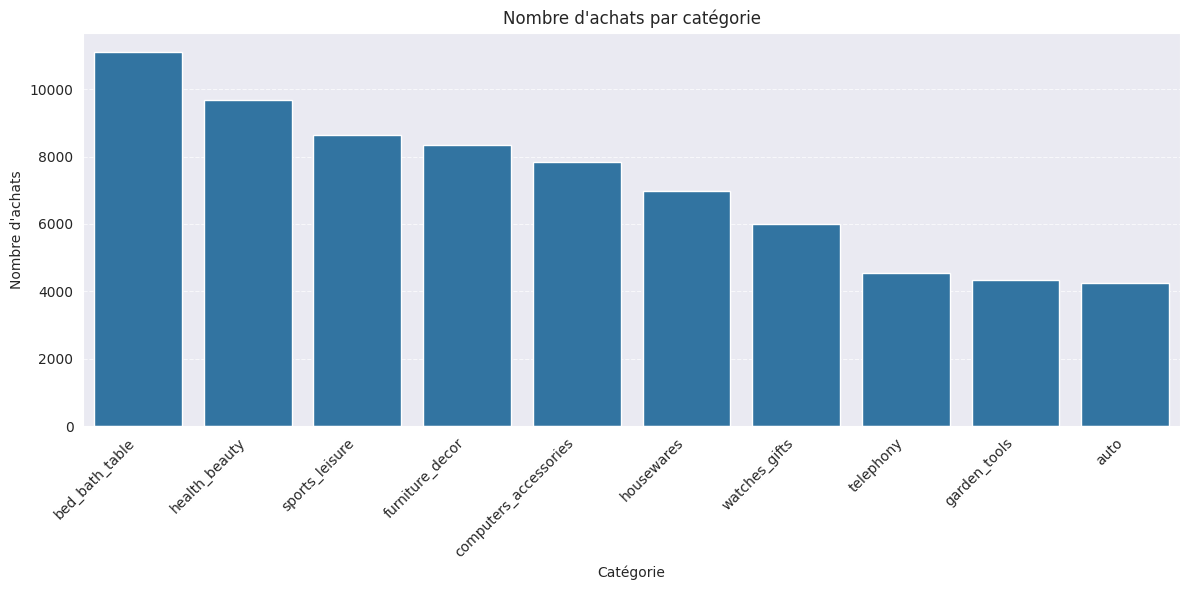

In [107]:
achats_par_categorie = donnees['category_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=achats_par_categorie.index, y=achats_par_categorie.values)

plt.title("Nombre d'achats par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')  # Rotation pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

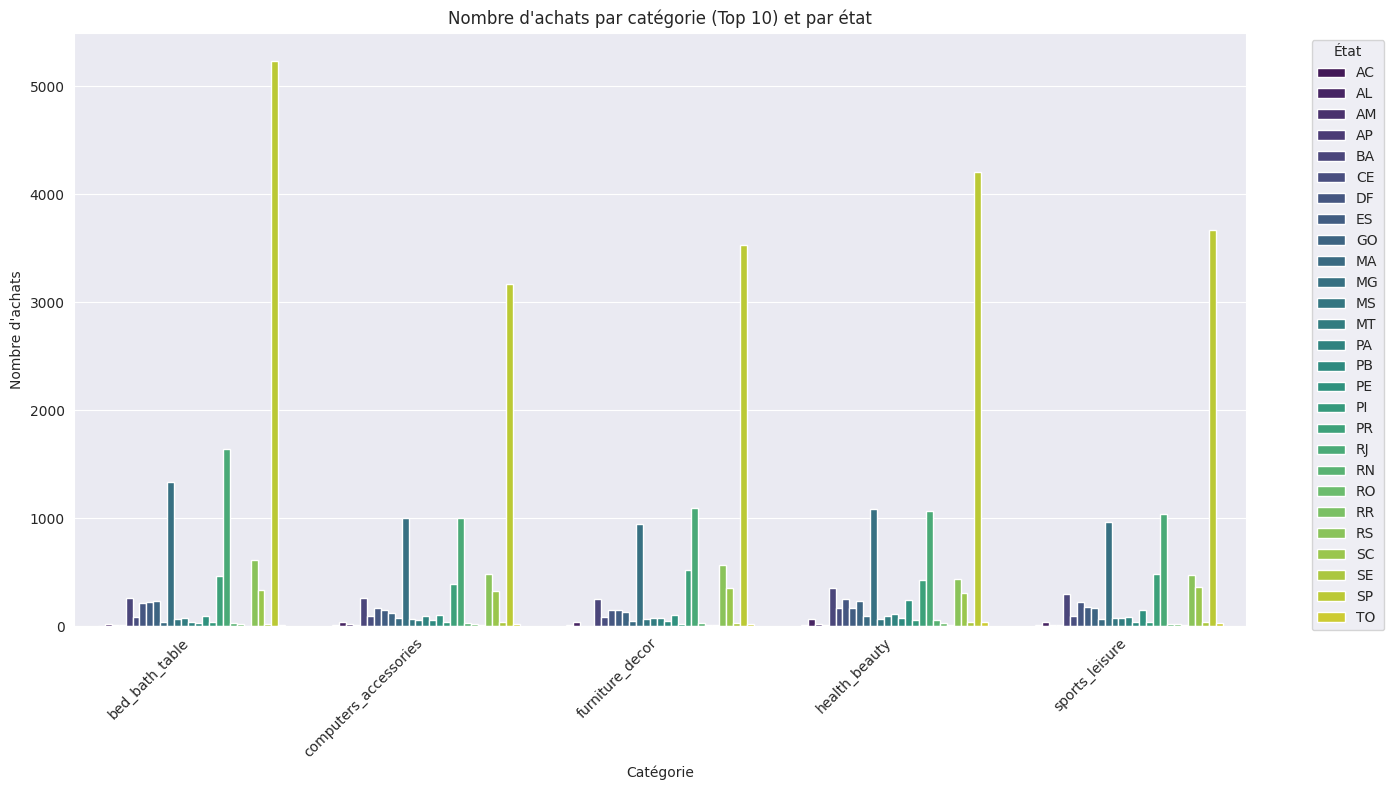

In [108]:
top_10_categories = donnees['category_name'].value_counts().head(5).index
filtre_donnees = donnees[donnees['category_name'].isin(top_10_categories)]

achats_par_categorie_etat = filtre_donnees.groupby(['cust_state', 'category_name']).size().reset_index(
    name='nombre_achats')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=achats_par_categorie_etat,
    x='category_name',
    y='nombre_achats',
    hue='cust_state',
    palette='viridis'
)

plt.title("Nombre d'achats par catégorie (Top 10) et par état")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.legend(title="État", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


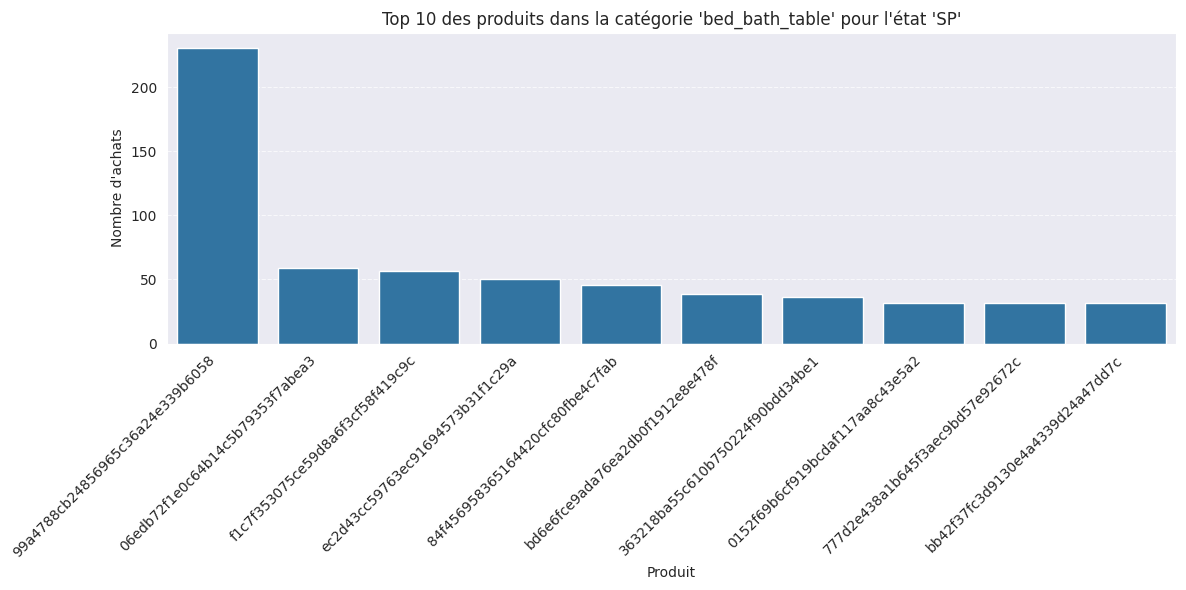

In [109]:
produits_bed_bath_table_SP = donnees[(donnees['category_name'] == 'bed_bath_table') & (donnees['cust_state'] == 'SP')]

top_produits_bed_bath_table_SP = (
    produits_bed_bath_table_SP['product_id']
    .value_counts()
    .head(10)
    .reset_index(name='nombre_achats')
    .rename(columns={'index': 'product_id'})
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_produits_bed_bath_table_SP,
    x='product_id',
    y='nombre_achats')

plt.title("Top 10 des produits dans la catégorie 'bed_bath_table' pour l'état 'SP'")
plt.xlabel("Produit")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


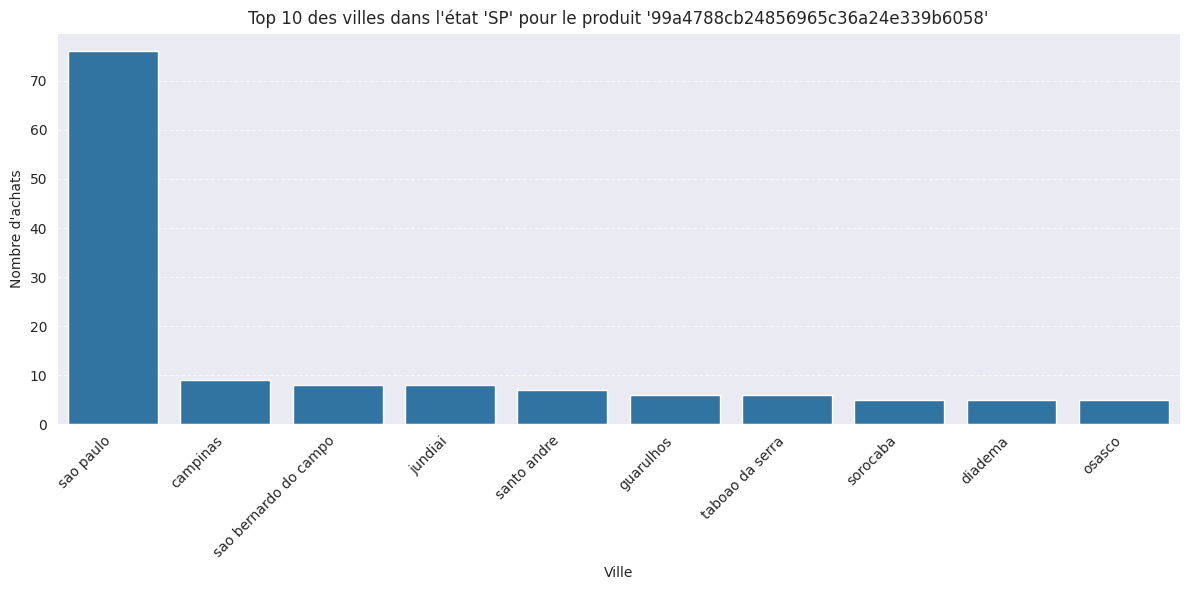

In [114]:
produits_SP_city = donnees[
    (donnees['cust_state'] == 'SP') &
    (donnees['product_id'] == '99a4788cb24856965c36a24e339b6058')
    ]

top_villes_produit_SP = (
    produits_SP_city['cust_city']
    .value_counts()
    .head(10)
    .reset_index(name='nombre_achats')
    .rename(columns={'index': 'cust_city'})
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_villes_produit_SP,
    x='cust_city',
    y='nombre_achats',
)

plt.title("Top 10 des villes dans l'état 'SP' pour le produit '99a4788cb24856965c36a24e339b6058'")
plt.xlabel("Ville")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


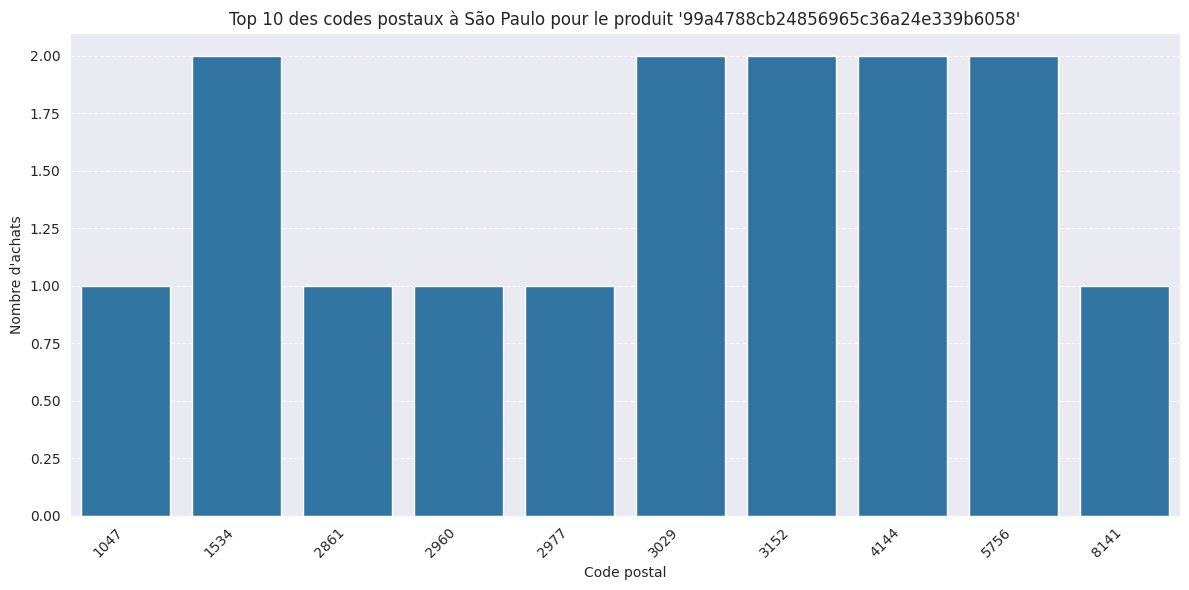

In [121]:
produits_sao_paulo_zipcode = donnees[
    (donnees['cust_city'] == 'sao paulo') &
    (donnees['product_id'] == '99a4788cb24856965c36a24e339b6058')
    ]

top_zipcodes_sao_paulo = (
    produits_sao_paulo_zipcode['cust_zip_code']
    .value_counts()
    .head(10)
    .reset_index(name='nombre_achats')
    .rename(columns={'index': 'cust_zip_code'})
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_zipcodes_sao_paulo,
    x='cust_zip_code',
    y='nombre_achats',
)

plt.title("Top 10 des codes postaux à São Paulo pour le produit '99a4788cb24856965c36a24e339b6058'")
plt.xlabel("Code postal")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analyse du prix moyen de la commande en fonction du moyen de paiement

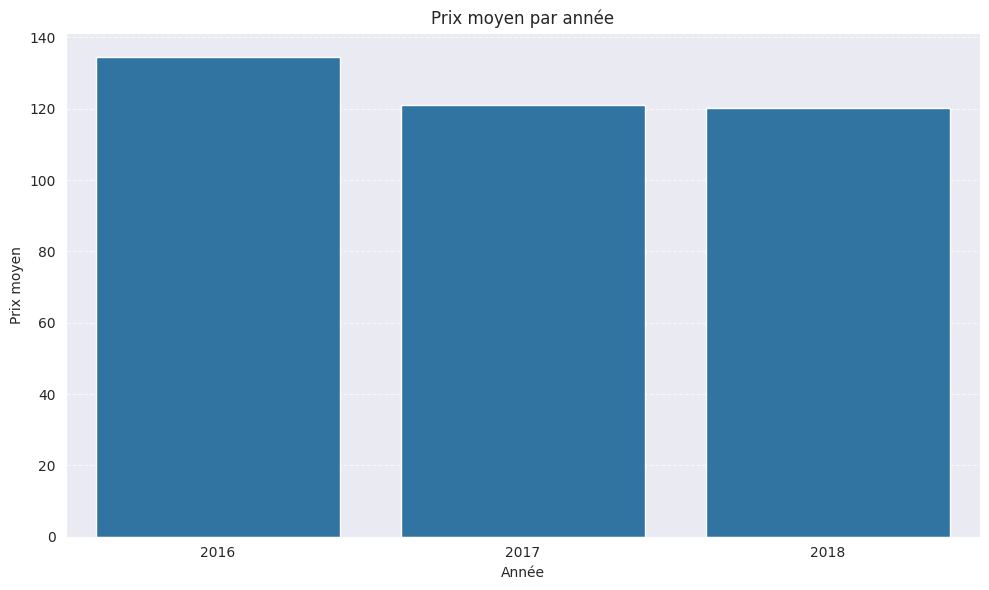

In [134]:
prix_moyen_par_annee = donnees.groupby('annee')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=prix_moyen_par_annee,
    x='annee',
    y='price',

)

plt.title("Prix moyen par année")
plt.xlabel("Année")
plt.ylabel("Prix moyen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


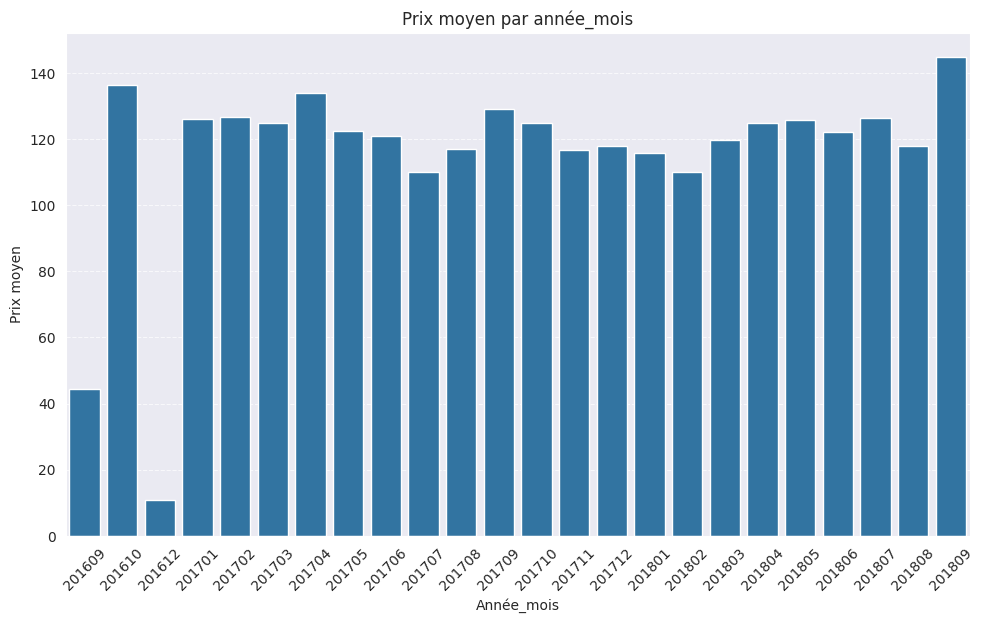

In [136]:
prix_moyen_par_annee_mois = donnees.groupby('annee_mois')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=prix_moyen_par_annee_mois,
    x='annee_mois',
    y='price',

)

plt.title("Prix moyen par année_mois")
plt.xlabel("Année_mois")
plt.ylabel("Prix moyen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()
